## 数据读取

In [2]:
# 首先，我们需要加载和查看上传的 CSV 文件的内容，以了解其结构和数据类型。
import pandas as pd

# 加载数据
data_path = '/Users/huangrui/Desktop/Project/聚类分析/shanghairestaurant.csv'
df = pd.read_csv(data_path)

# 显示数据的前几行，以及基本信息
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22189 entries, 0 to 22188
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shop_name          22189 non-null  object 
 1   comment_num        20056 non-null  float64
 2   avg_consume        15488 non-null  float64
 3   main_cuisine       22189 non-null  object 
 4   address            22188 non-null  object 
 5   recommend_cuisine  18062 non-null  object 
 6   detail_url         22189 non-null  object 
 7   taste_score        19827 non-null  object 
 8   env_score          19834 non-null  object 
 9   service_score      19835 non-null  object 
 10  phone              22188 non-null  object 
 11  address_detail     22188 non-null  object 
 12  id                 22189 non-null  int64  
dtypes: float64(2), int64(1), object(10)
memory usage: 2.2+ MB


(None,
            shop_name  comment_num  avg_consume main_cuisine   address  \
 0         Solo(衡山路店)      19087.0        198.0         意大利菜  衡山路/复兴西路   
 1  桂满陇·西湖船宴(人民广场世茂店)      14541.0         85.0           浙菜  人民广场/南京路   
 2       Jean Georges      11821.0        865.0          法国菜        外滩   
 3      鹿园 MOOSE(长宁店)       7564.0        541.0          淮扬菜  上海影城/新华路   
 4           逸道(外滩源店)       6505.0        499.0          淮扬菜        外滩   
 
   recommend_cuisine                                 detail_url taste_score  \
 0              餐前面包  https://www.dianping.com/shanghai/ch10/p2         8.3   
 1              吮指鸡爪  https://www.dianping.com/shanghai/ch10/p2         NaN   
 2    法式鹅肝酱酸樱桃和糖衣开心果  https://www.dianping.com/shanghai/ch10/p2         7.9   
 3             老北京烤鸭  https://www.dianping.com/shanghai/ch10/p2         8.2   
 4         天目竹笋干烧红烧肉  https://www.dianping.com/shanghai/ch10/p2           9   
 
   env_score service_score                             phone  \
 0     

## 数据预处理

In [3]:
# 数据清理和预处理

# 将评分字段转换为数值类型
df['taste_score'] = pd.to_numeric(df['taste_score'], errors='coerce')
df['env_score'] = pd.to_numeric(df['env_score'], errors='coerce')
df['service_score'] = pd.to_numeric(df['service_score'], errors='coerce')

# 检查缺失值情况
missing_values = df.isnull().sum()

# 填充缺失的评分字段为平均值
df['taste_score'].fillna(df['taste_score'].mean(), inplace=True)
df['env_score'].fillna(df['env_score'].mean(), inplace=True)
df['service_score'].fillna(df['service_score'].mean(), inplace=True)

# 查看处理后的数据概况和缺失值情况
df.info(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22189 entries, 0 to 22188
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shop_name          22189 non-null  object 
 1   comment_num        20056 non-null  float64
 2   avg_consume        15488 non-null  float64
 3   main_cuisine       22189 non-null  object 
 4   address            22188 non-null  object 
 5   recommend_cuisine  18062 non-null  object 
 6   detail_url         22189 non-null  object 
 7   taste_score        22189 non-null  float64
 8   env_score          22189 non-null  float64
 9   service_score      22189 non-null  float64
 10  phone              22188 non-null  object 
 11  address_detail     22188 non-null  object 
 12  id                 22189 non-null  int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 2.2+ MB


(None,
 shop_name               0
 comment_num          2133
 avg_consume          6701
 main_cuisine            0
 address                 1
 recommend_cuisine    4127
 detail_url              0
 taste_score          2363
 env_score            2356
 service_score        2355
 phone                   1
 address_detail          1
 id                      0
 dtype: int64)

## 菜系偏好分析

In [4]:
# 菜系偏好分析：统计各个菜系的餐厅数量、平均评分（口味、环境、服务）、平均价格

# 按菜系分组并进行计算
cuisine_stats = df.groupby('main_cuisine').agg(
    num_restaurants=('id', 'count'),  # 餐厅数量
    avg_taste_score=('taste_score', 'mean'),  # 平均口味评分
    avg_env_score=('env_score', 'mean'),  # 平均环境评分
    avg_service_score=('service_score', 'mean'),  # 平均服务评分
    avg_price=('avg_consume', 'mean')  # 平均价格
).sort_values(by='num_restaurants', ascending=False)

cuisine_stats.head(10)  # 展示前10个最常见的菜系

,num_restaurants,avg_taste_score,avg_env_score,avg_service_score,avg_price
main_cuisine,,,,,
粥粉面,1499,7.617139,7.564607,7.605287,21.083902
茶餐厅,789,7.824531,7.834281,7.828536,40.820402
咖啡厅,724,8.236138,8.288327,8.359726,36.173370
湘菜,720,8.287210,8.276387,8.240796,74.526395
小龙虾,707,7.433667,7.379778,7.421847,96.470320
私房菜,693,7.299292,7.295740,7.297515,216.341463
粤式茶点,676,7.717278,7.739604,7.605863,64.905172
西餐,656,8.365758,8.472805,8.430642,137.667315
东北菜,637,7.489309,7.482703,7.500002,59.417062


In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 设置字体为SimHei显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False 


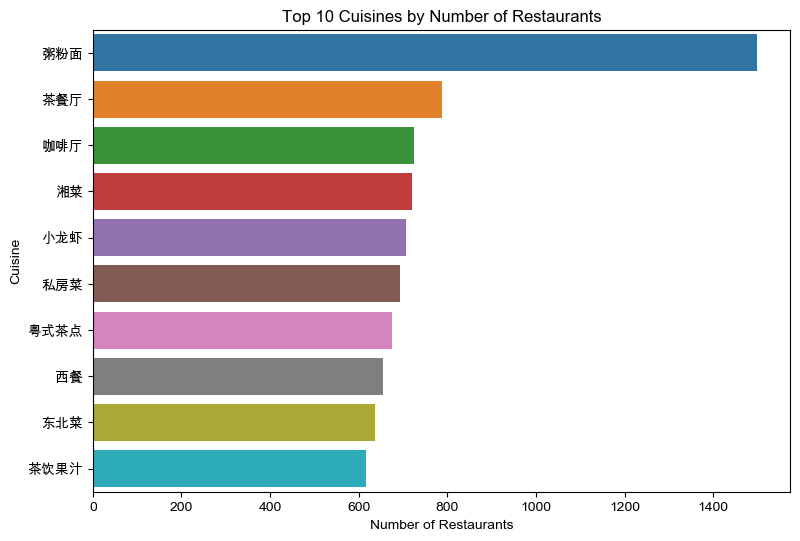

In [6]:
# 绘制各菜系的餐厅数量
plt.figure(figsize=(9, 6))
sns.barplot(x=cuisine_stats['num_restaurants'].head(10), y=cuisine_stats.head(10).index)
plt.title('Top 10 Cuisines by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

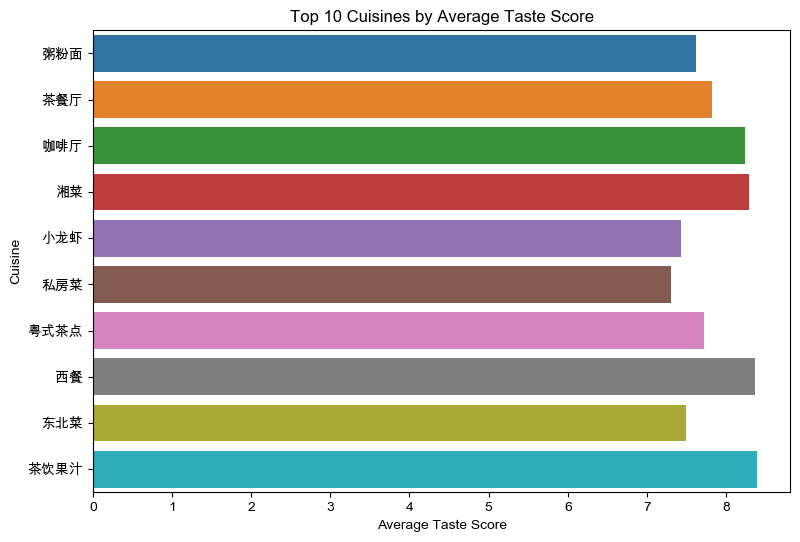

In [7]:
# 绘制平均口味评分
plt.figure(figsize=(9, 6))
sns.barplot(x=cuisine_stats['avg_taste_score'].head(10), y=cuisine_stats.head(10).index)
plt.title('Top 10 Cuisines by Average Taste Score')
plt.xlabel('Average Taste Score')
plt.ylabel('Cuisine')
plt.show()

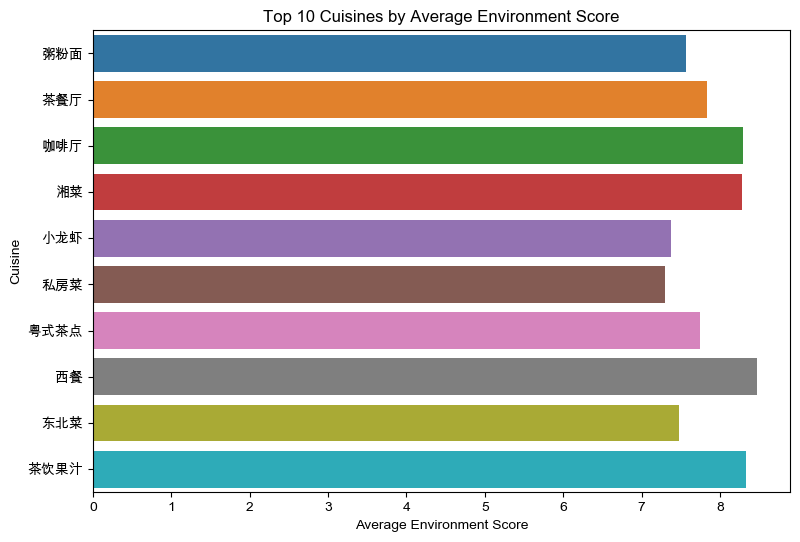

In [8]:
# 绘制平均环境评分
plt.figure(figsize=(9, 6))
sns.barplot(x=cuisine_stats['avg_env_score'].head(10), y=cuisine_stats.head(10).index)
plt.title('Top 10 Cuisines by Average Environment Score')
plt.xlabel('Average Environment Score')
plt.ylabel('Cuisine')
plt.show()

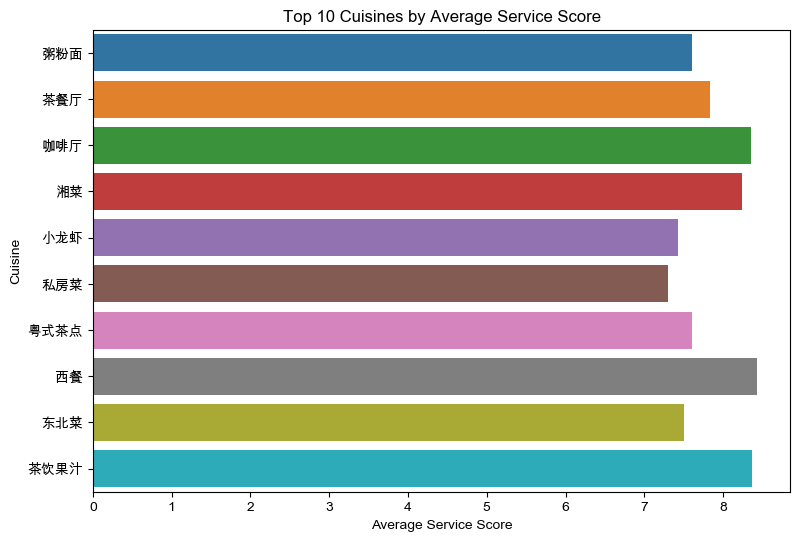

In [9]:
# 绘制平均服务评分
plt.figure(figsize=(9, 6))
sns.barplot(x=cuisine_stats['avg_service_score'].head(10), y=cuisine_stats.head(10).index)
plt.title('Top 10 Cuisines by Average Service Score')
plt.xlabel('Average Service Score')
plt.ylabel('Cuisine')
plt.show()

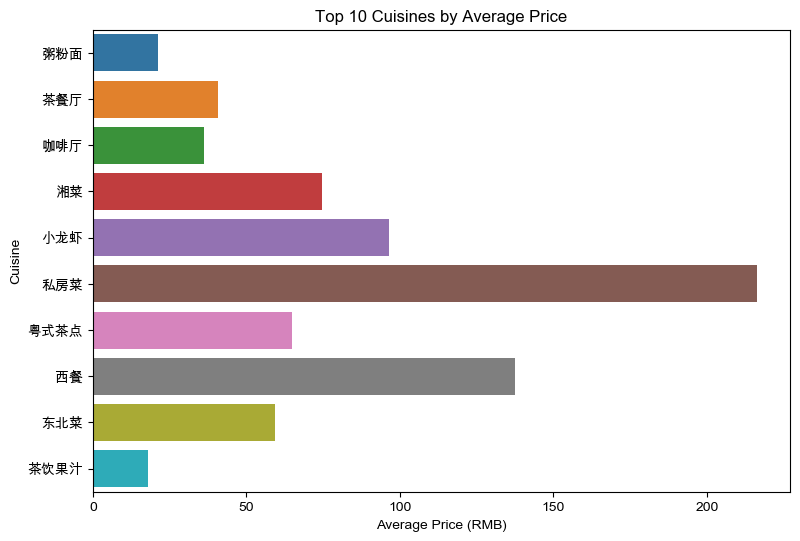

In [10]:
# 绘制平均价格
plt.figure(figsize=(9, 6))
sns.barplot(x=cuisine_stats['avg_price'].head(10), y=cuisine_stats.head(10).index)
plt.title('Top 10 Cuisines by Average Price')
plt.xlabel('Average Price (RMB)')
plt.ylabel('Cuisine')
plt.show()

In [11]:
# 将以上分析结果导出到CSV文件
output_path = 'shanghai_cuisine_analysis.csv'
cuisine_stats.head(10).to_csv(output_path)

## 餐厅分析

### 性价比

In [12]:
# 计算性价比分数：使用口味、环境和服务评分的平均值除以平均消费
# 注意：为了避免除以零，我们只考虑avg_consume大于零的餐厅
df_valid = df[df['avg_consume'] > 0].copy()
df_valid['value_for_money'] = (df_valid[['taste_score', 'env_score', 'service_score']].mean(axis=1)) / df_valid['avg_consume']

# 找出性价比分数最高的餐厅
top_value_for_money_restaurants = df_valid.sort_values(by='value_for_money', ascending=False).head(10)

top_value_for_money_restaurants[['shop_name', 'main_cuisine', 'taste_score', 'env_score', 'service_score', 'avg_consume', 'value_for_money']]


,shop_name,main_cuisine,taste_score,env_score,service_score,avg_consume,value_for_money
20641,雀巢五羊冰淇淋(新塘兆年店),冰淇淋,7.9,7.8,8.0,1.0,7.900000
6469,增城荔江雪糕经营部,冰淇淋,8.2,7.9,8.2,3.0,2.700000
16372,糖水铺(基立北街店),甜品,8.2,7.2,7.8,4.0,1.933333
2720,上海鸡汁包(晓港中马路店),包子,7.4,6.9,7.4,4.0,1.808333
2170,一万粒胚芽浓浆(天河公园店),生鲜,7.0,7.0,7.0,4.0,1.750000
13570,源宏豆腐坊(沙园西华市场店),生鲜,7.2,6.7,7.0,4.0,1.741667
18724,裕福豆花(小洲村店),甜品,7.8,7.9,7.9,5.0,1.573333
19931,金典面包(燕子岗店),其他美食,7.4,7.4,7.5,5.0,1.486667
4914,华农酸奶展销部(六一店),生鲜,7.3,7.4,7.4,5.0,1.473333
6911,大榕树(人民街店),美食,7.3,7.2,7.3,5.0,1.453333


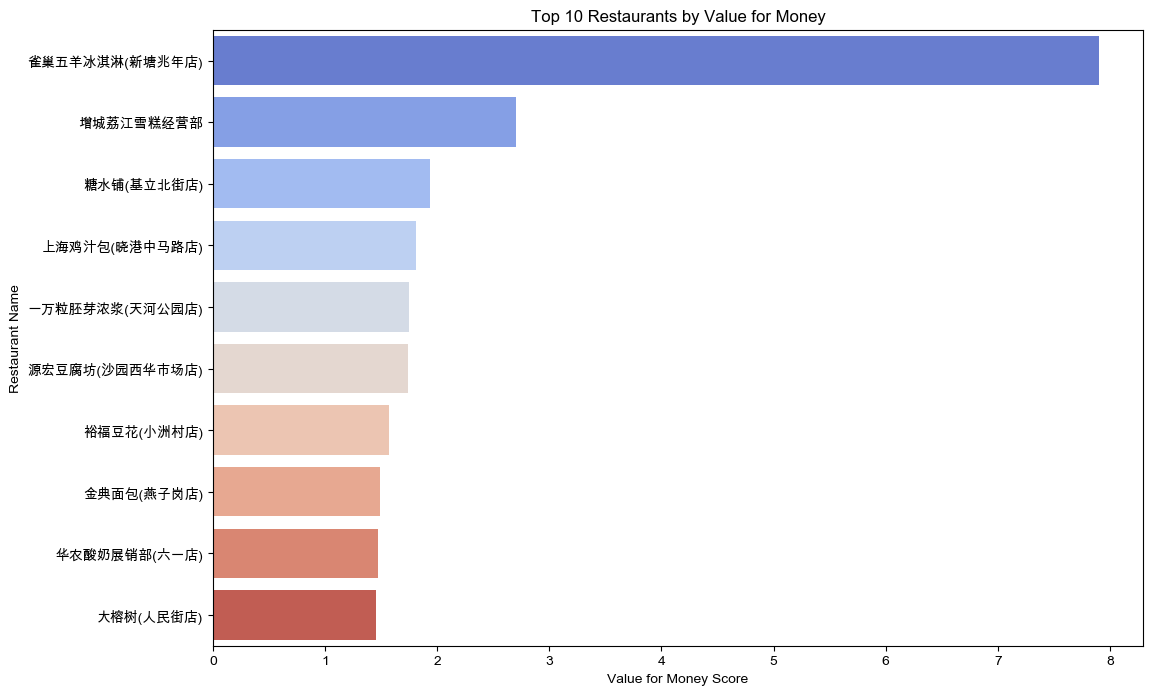

In [13]:
# 对性价比最高的餐厅进行可视化展示
plt.figure(figsize=(12, 8))
sns.barplot(x='value_for_money', y='shop_name', data=top_value_for_money_restaurants, palette='coolwarm')
plt.title('Top 10 Restaurants by Value for Money')
plt.xlabel('Value for Money Score')
plt.ylabel('Restaurant Name')
plt.show()

# 导出性价比最高的餐厅数据到CSV
value_for_money_path = 'top_value_for_money_restaurants.csv'
top_value_for_money_restaurants.to_csv(value_for_money_path, index=False)


### 销量

In [14]:
#找出销量最高的餐厅
top_sales_restaurants = df.sort_values(by='comment_num', ascending=False).head(10)
top_sales_restaurants[['shop_name', 'comment_num', 'main_cuisine', 'avg_consume']]

,shop_name,comment_num,main_cuisine,avg_consume
6436,四海一家自助餐(长隆万博店),51663.0,自助餐,162.0
14081,点都德(聚福楼店),40656.0,粤式茶点,80.0
14078,点都德(聚福楼店),40656.0,粤式茶点,80.0
17997,蒙肥羊·潮汕牛肉火锅烤肉自助(岗顶店),36151.0,自助餐,84.0
687,哥老官重庆美蛙鱼头(人民广场店),32715.0,重庆火锅,135.0
711,人和馆(肇嘉浜路店),32668.0,上海本帮菜,204.0
578,人和馆(肇嘉浜路店),32668.0,上海本帮菜,204.0
222,人和馆(肇嘉浜路店),32667.0,上海本帮菜,204.0
282,人和馆(肇嘉浜路店),32667.0,上海本帮菜,204.0
376,人和馆(肇嘉浜路店),32667.0,上海本帮菜,204.0


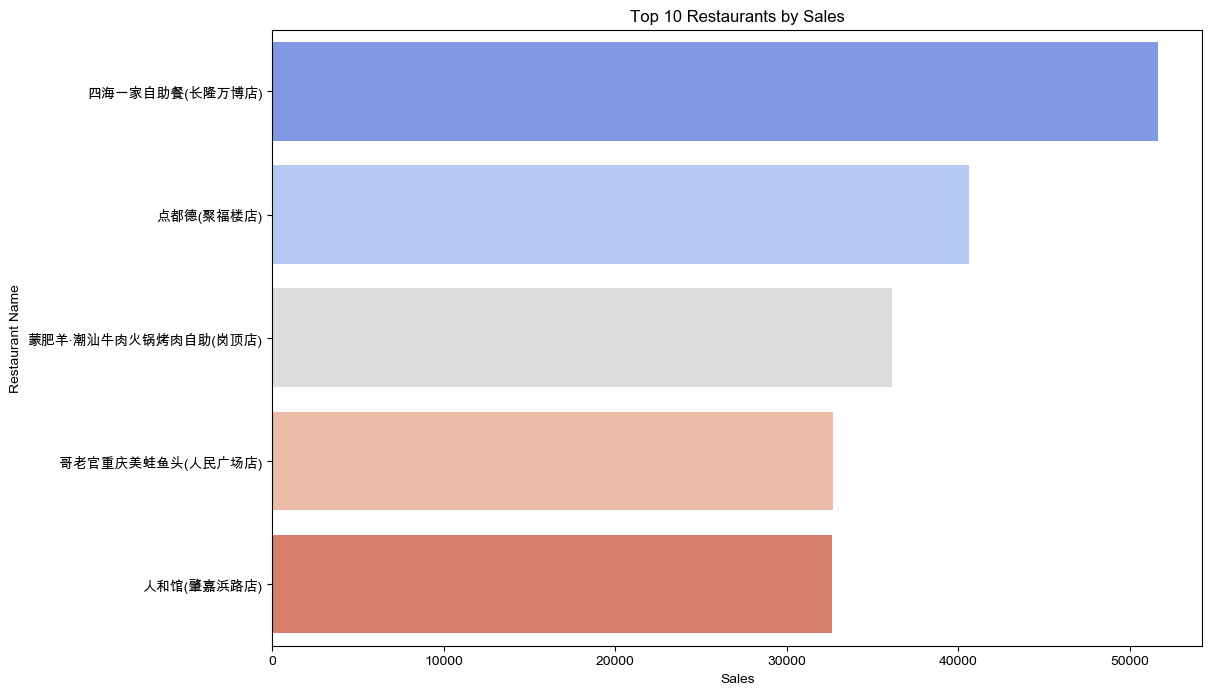

In [15]:
# 对性价比最高的餐厅进行可视化展示
plt.figure(figsize=(12, 8))
sns.barplot(x='comment_num', y='shop_name', data=top_sales_restaurants, palette='coolwarm')
plt.title('Top 10 Restaurants by Sales')
plt.xlabel('Sales')
plt.ylabel('Restaurant Name')
plt.show()

# 导出性价比最高的餐厅数据到CSV
sales_path = 'top_sales_restaurants.csv'
top_sales_restaurants.to_csv(sales_path, index=False)

### 评分

In [16]:
# 计算评分平均值
df['average_score'] = df[['taste_score', 'env_score', 'service_score']].mean(axis=1)

# 根据平均评分进行降序排序，并选出前十
top_rated_restaurants = df.sort_values(by='average_score', ascending=False).head(10)
top_rated_restaurants[['shop_name', 'average_score', 'main_cuisine', 'avg_consume', 'comment_num']]


,shop_name,average_score,main_cuisine,avg_consume,comment_num
18877,西贝莜面村(广州黄埔大悦汇店),9.400000,西北民间菜,98.0,1213.0
7371,好客之家(均禾店),9.366667,客家菜,71.0,1511.0
7372,好客之家(均禾店),9.366667,客家菜,72.0,1512.0
7476,如轩·海鲜砂锅粥·潮汕菜(天河领展广场店),9.300000,潮汕菜,85.0,4202.0
15244,百里江-顺德菜(万科云店),9.300000,顺德菜,79.0,521.0
7159,大赞·炙烧寿司(至泰广场店),9.300000,寿司,89.0,3938.0
7121,大赞·炙烧寿司(万民城店),9.266667,寿司,91.0,2819.0
18874,西贝莜面村(广州海珠万达店),9.266667,西北民间菜,88.0,1670.0
539,叶叶菩提(太原别墅店),9.266667,素食,597.0,4066.0
4930,南海渔村·徐博馆(琶洲店),9.233333,广州菜,315.0,226.0


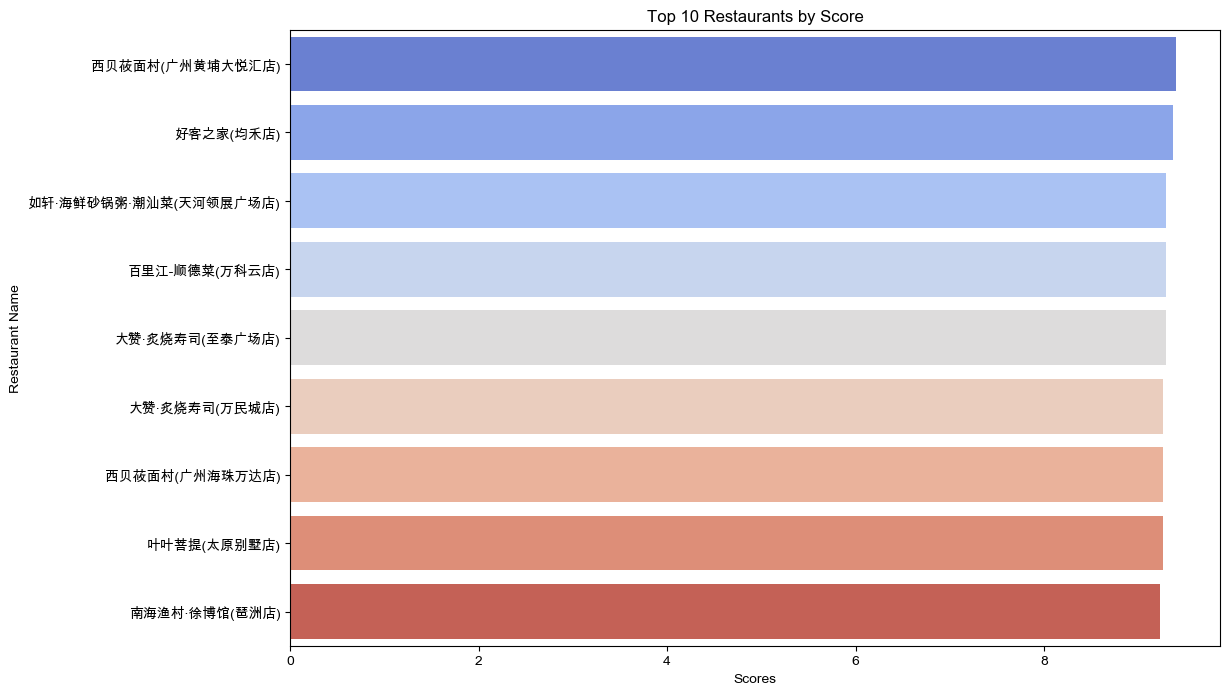

In [17]:
# 对评分最高的餐厅进行可视化展示
plt.figure(figsize=(12, 8))
sns.barplot(x='average_score', y='shop_name', data=top_rated_restaurants, palette='coolwarm')
plt.title('Top 10 Restaurants by Score')
plt.xlabel('Scores')
plt.ylabel('Restaurant Name')
plt.show()

# 导出性价比最高的餐厅数据到CSV
rated_path = 'top_rated_restaurants.csv'
top_rated_restaurants.to_csv(rated_path, index=False)

## 美食分析

In [18]:
from collections import defaultdict

# 初始化一个字典来存储每种推荐菜品的评论总数
cuisine_comment_count = defaultdict(float)

# 遍历每行数据
for _, row in df.iterrows():
    if pd.notna(row['recommend_cuisine']) and pd.notna(row['comment_num']):
        # 将推荐菜品字符串分割成单独的菜品
        cuisines = row['recommend_cuisine'].split('、')
        for cuisine in cuisines:
            # 累加每种菜品的评论数
            cuisine_comment_count[cuisine.strip()] += row['comment_num']

# 将字典转换成DataFrame以便于排序和可视化
cuisine_comments_df = pd.DataFrame(cuisine_comment_count.items(), columns=['Cuisine', 'Total Comments']).sort_values(by='Total Comments', ascending=False)

# 查看评论数最高的前10种菜品
top_cuisines_by_comments = cuisine_comments_df.head(10)
top_cuisines_by_comments

,Cuisine,Total Comments
49,金莎海虾红米肠,409859.0
12,蟹粉捞饭,392241.0
41,寿喜锅,357712.0
36,金莎红米肠,288926.0
34,招牌寿喜锅,263840.0
7290,招牌虾饺皇,245736.0
375,百合酱蒸凤爪,240189.0
10678,榴莲比萨,218453.0
82,蛤蜊猪肝面,191669.0
298,五花肉,185055.0


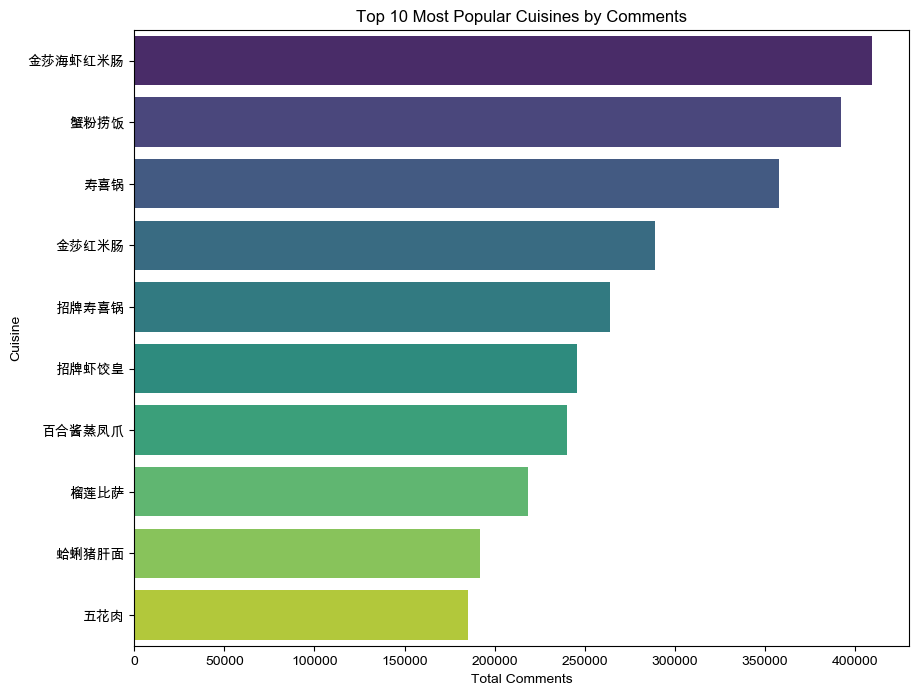

In [19]:
# 可视化销量最高的美食
plt.figure(figsize=(10, 8))
sns.barplot(x='Total Comments', y='Cuisine', data=top_cuisines_by_comments, palette='viridis')
plt.title('Top 10 Most Popular Cuisines by Comments')
plt.xlabel('Total Comments')
plt.ylabel('Cuisine')
plt.show()

# 导出销量最高的美食数据到CSV文件
popular_cuisines_path = 'popular_cuisines_by_comments.csv'
top_cuisines_by_comments.to_csv(popular_cuisines_path, index=False)

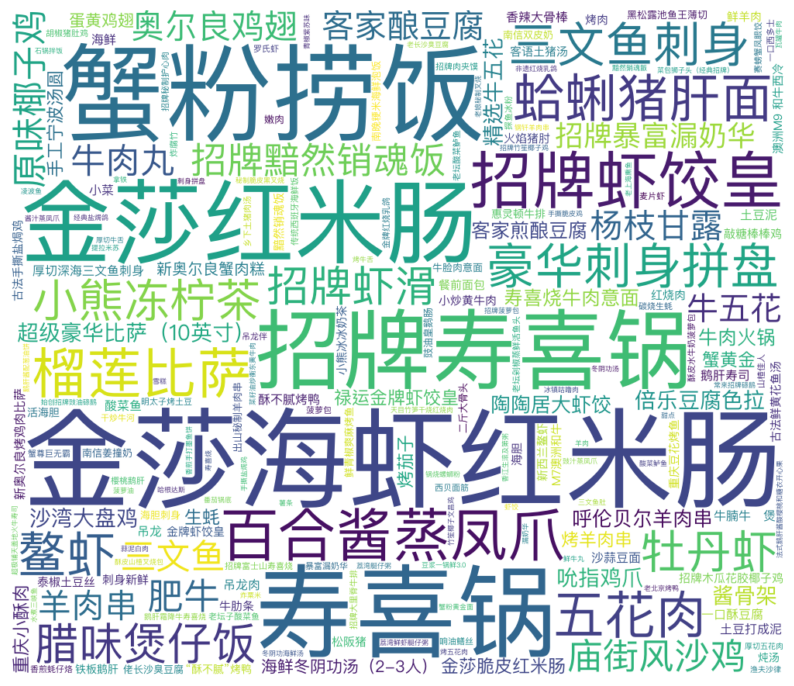

In [20]:
#词云图
from wordcloud import WordCloud

# 创建一个词云对象
font_path="/System/Library/fonts/PingFang.ttc" #解决中文乱码
wordcloud = WordCloud(background_color="white", width=1000, height=860, margin=2, font_path=font_path).generate_from_frequencies(cuisine_comment_count)

# 使用matplotlib来显示词云图
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 地区分析

In [21]:
cuisine_stats = df.groupby('main_cuisine').agg(
    num_restaurants=('id', 'count'),  # 餐厅数量
    avg_taste_score=('taste_score', 'mean'),  # 平均口味评分
    avg_env_score=('env_score', 'mean'),  # 平均环境评分
    avg_service_score=('service_score', 'mean'),  # 平均服务评分
    avg_price=('avg_consume', 'mean')  # 平均价格
).sort_values(by='num_restaurants', ascending=False)


In [22]:
# Extract the primary area from the address column
df['primary_area'] = df['address'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else None)

# Now, we will summarize the data by primary area
# Count restaurants, calculate mean of average consumption and mean of average score for each area
area_summary = df.groupby('primary_area').agg(
    num_restaurants=('id', 'count'),  # 餐厅数量
    avg_taste_score=('taste_score', 'mean'),  # 平均口味评分
    avg_env_score=('env_score', 'mean'),  # 平均环境评分
    avg_service_score=('service_score', 'mean'),  # 平均服务评分
    avg_price=('avg_consume', 'mean')  # 平均价格
).sort_values(by='num_restaurants', ascending=False)

area_summary.head(10)

,num_restaurants,avg_taste_score,avg_env_score,avg_service_score,avg_price
primary_area,,,,,
长隆,715,8.014667,8.023328,8.018679,90.806142
天河城,654,8.227524,8.211081,8.255889,83.656814
北京路商业区,608,8.053800,7.962656,8.047582,56.934901
车陂,577,7.823339,7.803794,7.828936,66.686869
珠江新城,522,8.355261,8.432656,8.395571,194.204000
市桥,454,7.753991,7.726187,7.754037,58.852459
工业大道沿线,390,7.866367,7.809089,7.849995,56.971429
客村,388,7.910363,7.875747,7.905308,77.578947
钟村,382,7.803552,7.796705,7.781460,67.047431


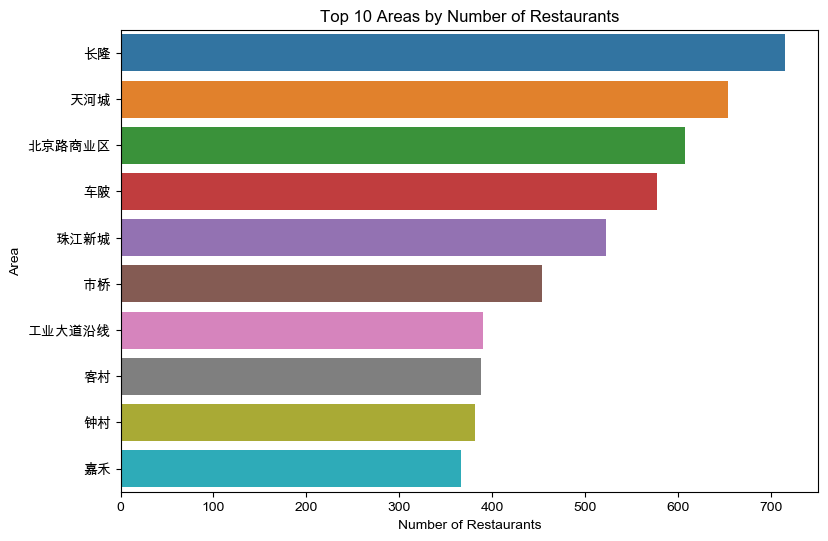

In [23]:
# 绘制各地区的餐厅数量
plt.figure(figsize=(9, 6))
sns.barplot(x=area_summary['num_restaurants'].head(10), y=area_summary.head(10).index)
plt.title('Top 10 Areas by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Area')
plt.show()

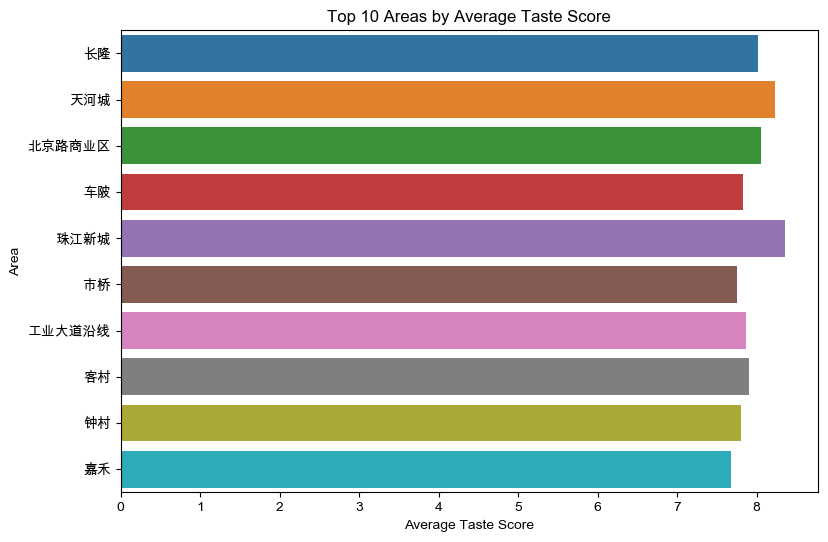

In [24]:
# 绘制平均口味评分
plt.figure(figsize=(9, 6))
sns.barplot(x=area_summary['avg_taste_score'].head(10), y=area_summary.head(10).index)
plt.title('Top 10 Areas by Average Taste Score')
plt.xlabel('Average Taste Score')
plt.ylabel('Area')
plt.show()

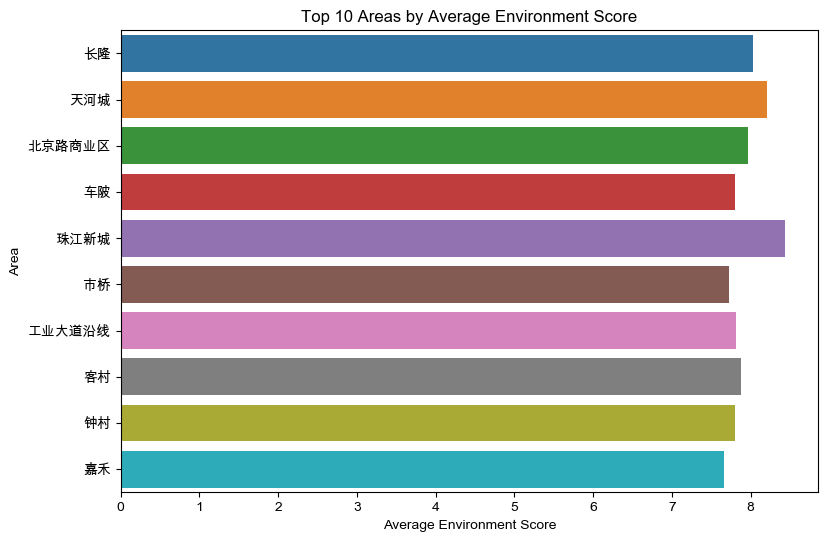

In [25]:
# 绘制平均环境评分
plt.figure(figsize=(9, 6))
sns.barplot(x=area_summary['avg_env_score'].head(10), y=area_summary.head(10).index)
plt.title('Top 10 Areas by Average Environment Score')
plt.xlabel('Average Environment Score')
plt.ylabel('Area')
plt.show()

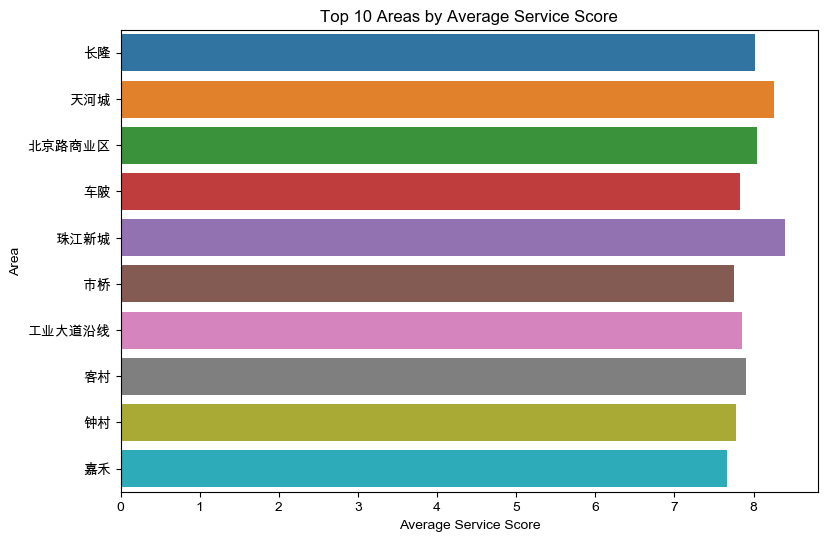

In [26]:
# 绘制平均服务评分
plt.figure(figsize=(9, 6))
sns.barplot(x=area_summary['avg_service_score'].head(10), y=area_summary.head(10).index)
plt.title('Top 10 Areas by Average Service Score')
plt.xlabel('Average Service Score')
plt.ylabel('Area')
plt.show()

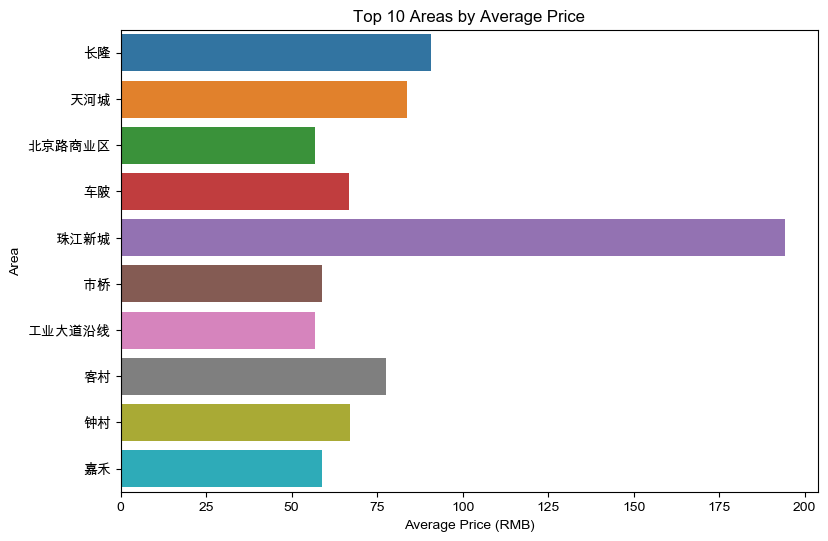

In [27]:
# 绘制平均价格
plt.figure(figsize=(9, 6))
sns.barplot(x=area_summary['avg_price'].head(10), y=area_summary.head(10).index)
plt.title('Top 10 Areas by Average Price')
plt.xlabel('Average Price (RMB)')
plt.ylabel('Area')
plt.show()

In [28]:
# 将以上分析结果导出到CSV文件
output_path = 'shanghai_area_analysis.csv'
area_summary.head(10).to_csv(output_path)